<a href="https://colab.research.google.com/github/devianpp/preprocessing_data/blob/main/Algorima_Genetika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Penerapan Algoritma Genetika untuk menyelesaikan TSP

Permasalahan : Dipa adalah wisatawan yang akan mengunjungi sejumlah n kota. setiap kota dikunjungi tepat satu kali. dari kota terakhir, Dipa akan kembali lagi ke kota awal.

Tujuan : mencari rute terpendek untuk mengunjungi sejumlah kota.

Penerapan Algoritma Genetika untuk menyelesaikan TSP

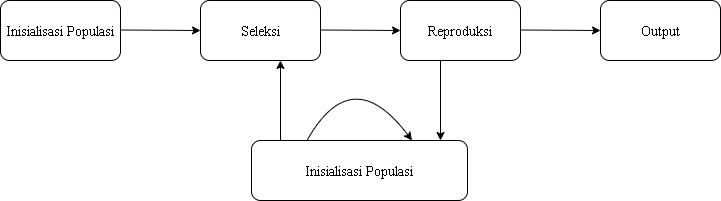

Memanggil Library

In [ ]:
import numpy as np
import random
from array import *

Membuat daftar kota

In [ ]:
daftarKota = [[0,0], [5,6], [1, 4], [3,4],[7,7]]
print("Koordinat Kota")
for i in daftarKota:
    for j in i:
        print(j,end = " ")
    print()

jumlahKota =  len(daftarKota)   
print("Jumlah Kota : ",jumlahKota)

Koordinat Kota
0 0 
5 6 
1 4 
3 4 
7 7 
Jumlah Kota :  5


Inisialisasi Populasi secara acak

array P diinisialisasikan sebagai array integer

In [ ]:
def initPopulasi(ukuranPopulasi,jumlahKota):
  P = np.empty((ukuranPopulasi,jumlahKota))
  P = P.astype('int')
  for i in range(ukuranPopulasi):
    I = np.random.permutation(jumlahKota)
    for j in range(jumlahKota):
      P[i][j]=I[j]
  return P


ukuranPopulasi = 4
P = initPopulasi (ukuranPopulasi,jumlahKota)
print(P)

[[1 0 3 4 2]
 [1 0 4 3 2]
 [4 0 2 3 1]
 [2 3 4 0 1]]


Membuat fungsi objektif

jarak yang diukur adalah jarak euclidian

In [ ]:
def fungsiObjectif(populasi,daftarKota):
  sz = populasi.shape
  ukuranPopulasi = sz[0]
  jumlahKota = sz[1]

  matrikJarak = np.empty((ukuranPopulasi))
  matrikJarak  = matrikJarak.astype('float')
  n = len(daftarKota)

  for i in range(ukuranPopulasi):
    jarak = 0
    for j in range(n-1):
      jrkX = daftarKota[populasi[i][j]][0]-daftarKota[populasi[i][j+1]][0]
      jrkY = daftarKota[populasi[i][j]][1]-daftarKota[populasi[i][j+1]][1]
      d = np.sqrt(jrkX**2 + jrkY**2 )   
      jarak = jarak  + d
      
    dn =  np.sqrt((daftarKota[populasi[i][n-1]][0]-daftarKota[populasi[i][0]][0])**2+ (daftarKota[populasi[i][n-1]][1]-daftarKota[populasi[i][0]][1])**2 )
    jarak = jarak  + dn
    matrikJarak[i] = jarak

  return matrikJarak

fitP = fungsiObjectif(P,daftarKota)
print(fitP)
#print(fitP.dtype)


[29.18188057 28.90826195 21.08709566 28.99058956]


seleksi menggunakan tournamen wheel

ukuran k=2

jumlah induk yang akan dipilih adalah 2

In [ ]:
def seleksi (P,fsObj):
  jmlInduk = 2
  sz = P.shape
  ukuranPopulasi = sz[0]
  jumlahKota = sz[1]

  Induk = np.empty((jmlInduk,jumlahKota))
  Induk = Induk.astype('int')
  
  for i in range (2):
    # memilih dua individu secara acak 
    r1 = random.randint(0,ukuranPopulasi-1)
    r2 = random.randint(0,ukuranPopulasi-1)
    
    if  fsObj[r1] < fsObj [r2]:
      for j in range(jumlahKota):
        Induk [i][j] = P[r1][j]
    else:
      for j in range(jumlahKota):
        Induk [i][j] = P[r2][j]
  return Induk

Induk = seleksi(P,fitP)
print(Induk)

[[4 2 1 0 3]
 [2 1 3 0 4]]


Rekombinasi dengan metode PMX juml anak yang dihasilkan adalah 2

In [ ]:
#crossover 

def PMX(Induk):
  sz = Induk.shape
  brs = sz[0]
  kol = sz[1]
  #print(sz, brs, kol)

  Anak = np.empty((2,kol))
  Anak = Anak.astype('int')

  r1 = random.randint(1,kol-2)

  for i0 in range(r1): 

    Anak [0][i0] = Induk[0][i0]
    Anak [1][i0] = Induk[1][i0]

  batasCek1 = r1
  batasCek2 = r1

  for i in range(kol):
    m = (i+r1)%kol

    n1 = Induk[0][i] 
    n2 = Induk[1][i]

    #mengecek apakah kota tertentu sudah ada di anak
    idxAda1 = 0
    idxAda2 = 0
    for j1 in range(batasCek1): 
      
      if batasCek1>(kol-1):
        idxAda1 = 1

      if Anak [0][j1] ==n2: 
        idxAda1 = 1
            
    for j2 in range(batasCek2): 
      
      if batasCek2>(kol-1):
        idxAda2 = 1

      if Anak [1][i0]  == n1: 
        idxAda2 = 1

    if idxAda1 == 0:
      Anak[0][batasCek1] = n2
      batasCek1 = batasCek1 +1
   
    if idxAda2 == 0:
      Anak[1][batasCek2] = n1
      batasCek2 = batasCek2 +1
   
  return Anak

AnakCX = PMX(Induk)
print("Anak :",AnakCX)

Anak : [[4 2 1 3 0]
 [2 1 4 2 0]]


Mutasi dengan swap

index kota yang di swap pada kedua anak sama

In [ ]:
def MutasiSwap(Induk):
  sz = Induk.shape
  brs = sz[0]
  kol = sz[1]

  Anak = np.empty((2,kol))
  Anak = Anak.astype('int')

  Anak = Induk

  r1 = random.randint(0,kol-1)
  r2 = random.randint(0,kol-1)

  while r1 == r2:
    r2 = random.randint(0,kol-1)

  I1rs1 = Induk [0][r1]
  I1rs2 = Induk [0][r2]
  I2rs1 = Induk [1][r1]
  I2rs2 = Induk [1][r2] 

  Anak [0][r1] = I1rs2
  Anak [0][r2] = I1rs1
  Anak [1][r1] = I2rs2  
  Anak [1][r2] = I2rs1

  return Anak

print("AnakCX :",AnakCX)
AnakM = MutasiSwap(AnakCX)
print("AnakM :",AnakM)

AnakCX : [[4 2 1 3 0]
 [2 1 4 2 0]]
AnakM : [[4 2 1 0 3]
 [2 1 4 0 2]]


Elitism (steady state replacement)

In [ ]:
def Elitism(P,Anak,fitP,fitAnak):
  szP = P.shape
  brsP = szP[0]
  kolP = szP[1]
  szA = Anak.shape
  brsA = szA[0]
  kolA = szA[1]

  #print (fitP)
  for i in range(brsA):
    iJelek = fitP.max()
    idxJelek = fitP.argmax()

    if fitAnak[i]<iJelek:
      fitP[idxJelek] = fitAnak[i]
      for j in range (kolP):
        P[idxJelek][j] = Anak[i][j]

  return [P,fitP]

fitAnak= fungsiObjectif(AnakM,daftarKota)
print(P)
print(AnakM)
print(fitP)
print(fitAnak)
P = Elitism (P,AnakM,fitP,fitAnak)
print(P)
print(fitP)

[[1 2 3 4 0]
 [2 1 3 0 4]
 [2 3 1 4 0]
 [4 2 1 0 3]]
[[4 2 1 0 3]
 [2 1 4 0 2]]
[29.18188057 28.90826195 21.08709566 28.99058956]
[28.99058956 20.73080449]
[array([[2, 1, 4, 0, 2],
       [2, 1, 3, 0, 4],
       [2, 3, 1, 4, 0],
       [4, 2, 1, 0, 3]]), array([20.73080449, 28.90826195, 21.08709566, 28.99058956])]
[20.73080449 28.90826195 21.08709566 28.99058956]


Prosedur GA

In [ ]:
# Inisialisasi paramater
PCX = 0.95
Pm = 0.01
ukuranPopulasi = 4
max_generasi = 5

# Inisialisasi populasi 

P = initPopulasi (ukuranPopulasi,jumlahKota)
print("P0 :",P)

#melakukan evaluasi P
fitP = fungsiObjectif(P,daftarKota)
print("fitness populasi awal:",fitP)

print("fitness terbaik awal:",fitP.min())
print("rute awal :",P[fitP.argmin()])


for i in range(max_generasi):
  # print("generasi :",i)
  Induk = seleksi(P,fitP)
  #print("Induk :",Induk)

  Anak = Induk

  rxo = random.random()

  if rxo < PCX:
    Anak = PMX(Induk)
    #print("AnakXO :",Anak)

    rm = random.random()
    if rm < Pm:
      Anak = MutasiSwap(Anak)
      #print("AnakR :",Anak)

  fitAnak = fungsiObjectif(Anak,daftarKota)
  #print("fitAnak :",fitAnak)

  # print("fitness:",fitAnak.min())

  [P, fitP]= Elitism (P,Anak,fitP,fitAnak)   
  
print("fitness populasi akhir:",fitP)
print("fitness akhir:",fitP.min())
print("rute akhir :",P[fitP.argmin()])

P0 : [[1 2 0 4 3]
 [0 1 4 2 3]
 [1 2 0 3 4]
 [3 1 4 0 2]]
fitness populasi awal: [26.32316364 23.75452159 20.83130956 21.08709566]
fitness terbaik awal: 20.83130955811703
rute awal : [1 2 0 3 4]
fitness populasi akhir: [20.83130956 20.83130956 20.83130956 21.08709566]
fitness akhir: 20.83130955811703
rute akhir : [1 2 0 3 4]
